In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

from PotentialClassifier import PotentialClassifier


from tqdm import tqdm

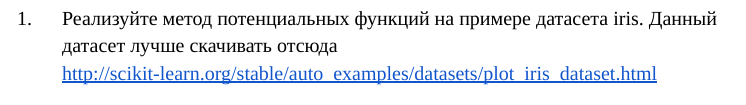

In [2]:
from IPython.display import Image

Image('task 1.png')

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Text(0, 0.5, 'petal width (cm)')

<Figure size 640x480 with 0 Axes>

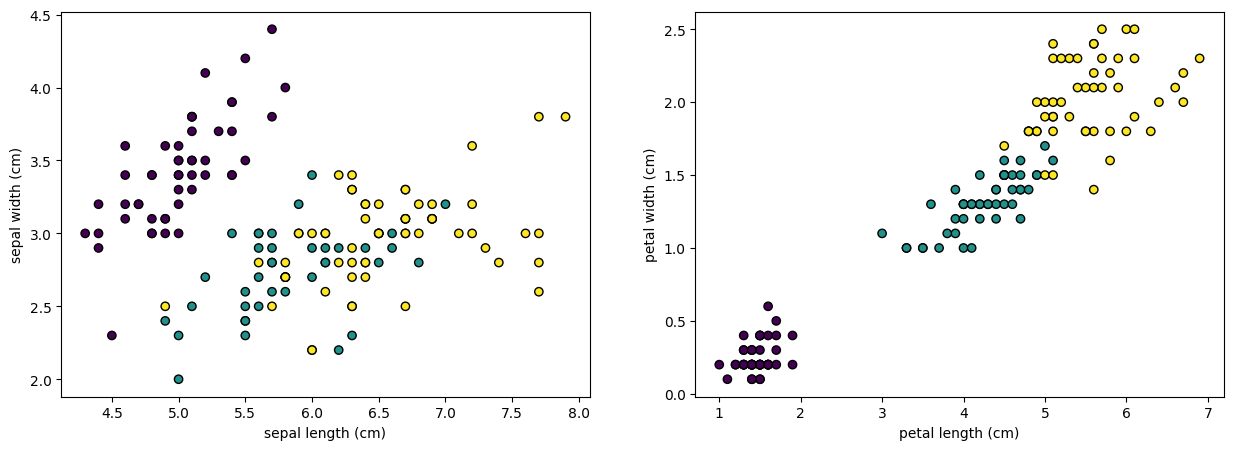

In [4]:
feature_names = iris.feature_names

plt.clf()
fig = plt.figure(figsize=(15, 5))

sep_plt = fig.add_subplot(121)
sep_plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
sep_plt.set_xlabel(feature_names[0])
sep_plt.set_ylabel(feature_names[1])

pet_plt = fig.add_subplot(122)
pet_plt.scatter(X[:, 2], X[:, 3], c=y, edgecolor="k")
pet_plt.set_xlabel(feature_names[2])
pet_plt.set_ylabel(feature_names[3])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

windows = np.arange(0.1, 30, 0.1)
accs = []
pots_counts = []

for window in tqdm(windows):
    model = PotentialClassifier(window_size=window)
    model.fit(X_train, y_train, 10)

    pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, pred)

    accs.append(accuracy)
    pots_counts.append(model.pots_count)

100%|██████████| 299/299 [00:13<00:00, 21.73it/s]


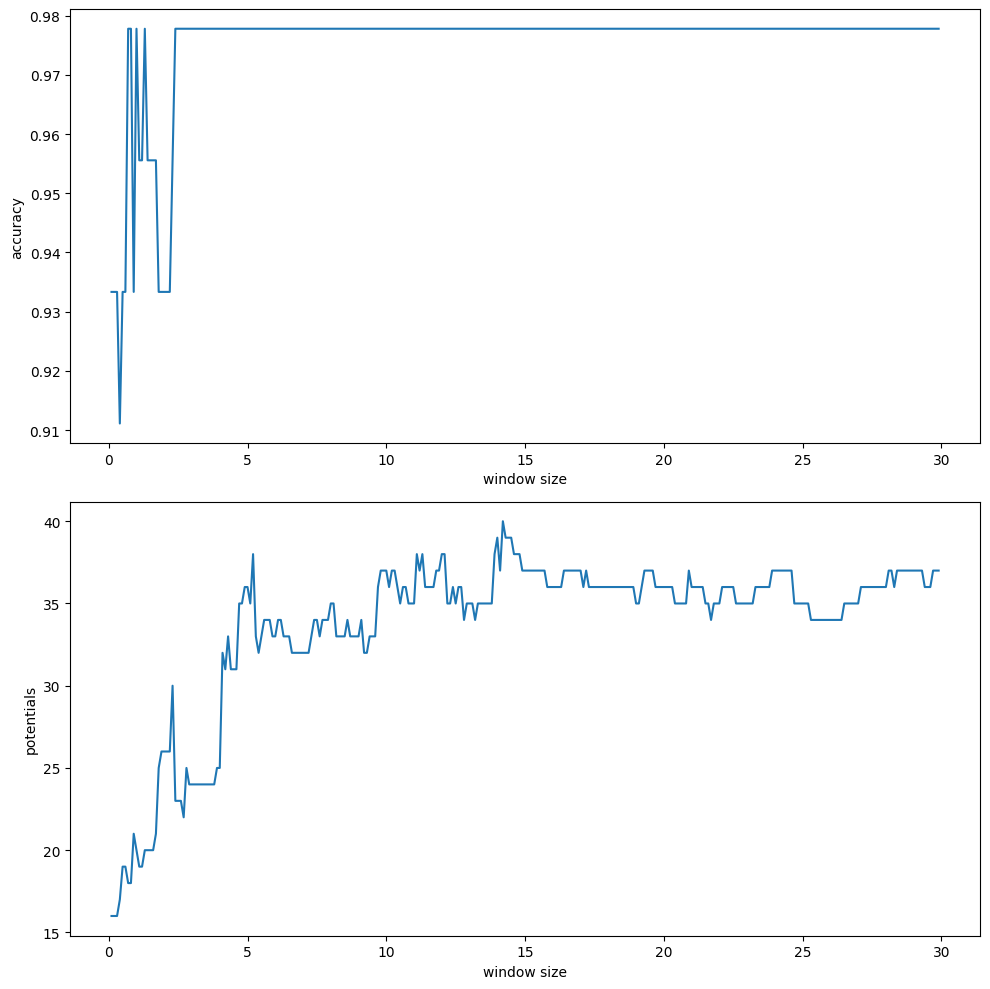

In [6]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.xlabel('window size')
plt.ylabel('accuracy')
plt.plot(windows, accs)
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.xlabel('window size')
plt.ylabel('potentials')
plt.plot(windows, pots_counts)
plt.tight_layout()

In [7]:
best_window = windows[np.argmax(accs)]

model = PotentialClassifier(window_size=best_window)
model.fit(X_train, y_train, 15)
pred = model.predict(X_test)

print("Test acc: ", metrics.accuracy_score(y_test, pred))
print("Train acc: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Whole data acc: ", metrics.accuracy_score(y, model.predict(X)))

Test acc:  0.9777777777777777
Train acc:  1.0
Whole data acc:  0.9933333333333333


Text(0, 0.5, 'petal width (cm)')

<Figure size 640x480 with 0 Axes>

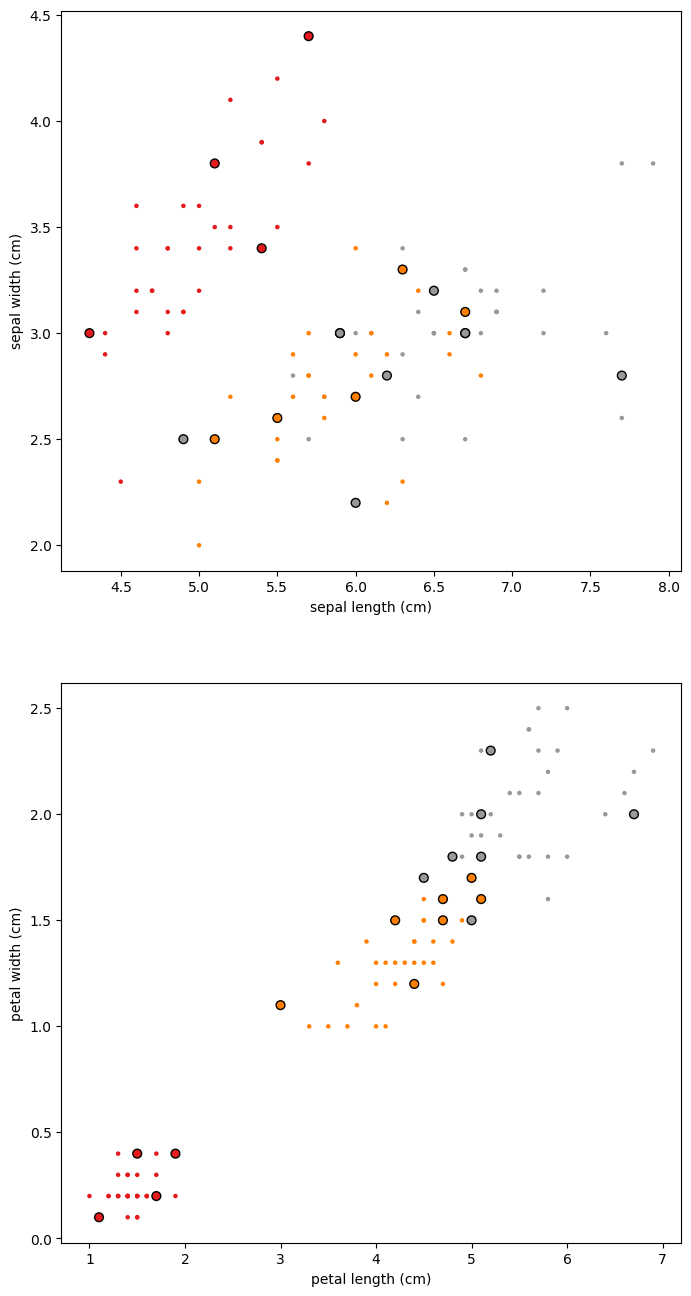

In [8]:
plt.clf()
fig = plt.figure(figsize=(8, 16))

indices = model.pot_ids
X_non_zeroed = X_train[indices]
y_non_zeroed = y_train[indices]

sep_plt = fig.add_subplot(211)
sep_plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=5, edgecolor=None, cmap=plt.cm.Set1)
sep_plt.scatter(X_non_zeroed[:, 0], X_non_zeroed[:, 1], c=y_non_zeroed, s=40, edgecolor="k", cmap=plt.cm.Set1)
sep_plt.set_xlabel(feature_names[0])
sep_plt.set_ylabel(feature_names[1])

pet_plt = fig.add_subplot(212)
pet_plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train, s=5, edgecolor=None, cmap=plt.cm.Set1)
pet_plt.scatter(X_non_zeroed[:, 2], X_non_zeroed[:, 3], c=y_non_zeroed, s=40, edgecolor="k", cmap=plt.cm.Set1)
pet_plt.set_xlabel(feature_names[2])
pet_plt.set_ylabel(feature_names[3])

Text(0, 0.5, 'petal width (cm)')

<Figure size 640x480 with 0 Axes>

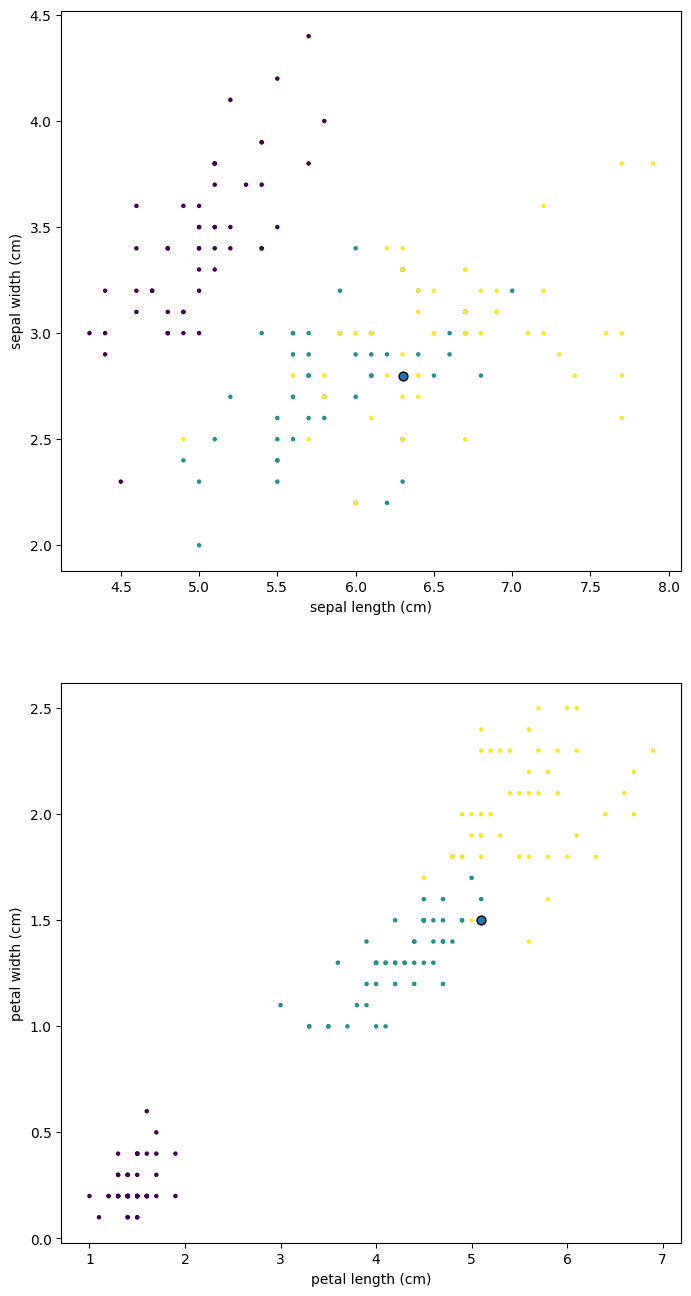

In [11]:
plt.clf()
fig = plt.figure(figsize=(8, 16))

indices = (y_test != pred)
X_non_zeroed = X_test[indices]
y_non_zeroed = y_test[indices]

sep_plt = fig.add_subplot(211)
sep_plt.scatter(X[:, 0], X[:, 1], c=y, s=5, edgecolor=None)
sep_plt.scatter(X_non_zeroed[:, 0], X_non_zeroed[:, 1], s=40, edgecolor="k")
sep_plt.set_xlabel(feature_names[0])
sep_plt.set_ylabel(feature_names[1])

pet_plt = fig.add_subplot(212)
pet_plt.scatter(X[:, 2], X[:, 3], c=y, s=5, edgecolor=None)
pet_plt.scatter(X_non_zeroed[:, 2], X_non_zeroed[:, 3], s=40, edgecolor="k")
pet_plt.set_xlabel(feature_names[2])
pet_plt.set_ylabel(feature_names[3])